In [1]:
import numpy as np
import scanpy as sc
import anndata as an
import pandas as pd

In [2]:
types = {
		'Monocytes' : [
			'CD14',
			'CD33',
			'LYZ',
			'FCER1G',
			'LGALS3',
			'CSF1R',
			'ITGAX',
			'ITGAM',
			'CD86',
			'HLA-DRB1'],
		'Dendritic cells' : [
			'LAD1',
			'LAMP3',
			'TSPAN13',
			'CLIC2',
			'FLT3'],
		'B-cells' : [
			'MS4A1',
			'CD19',
			'CD79A'],
		'T-helpers' : [
			'TNF',
			'TNFRSF18',
			'IFNG',
			'IL2RA',
			'BATF'],
		'T cells' : [
			'CD27',
			'CD69',
			'CD2',
			'CD3D',
			'CXCR3',
			'CCL5',
			'IL7R',
			'CXCL8',
			'GZMK'],
		'Natural Killers' : [
			'NKG7',
			'GNLY',
			'PRF1',
			'FCGR3A',
			'NCAM1',
			'TYROBP']
	}

marker_genes = [
			'CD14',
			'CD33',
			'LYZ',
			'FCER1G',
			'LGALS3',
			'CSF1R',
			'ITGAX',
			'ITGAM',
			'CD86',
			'HLA-DRB1',
			'LAD1',
			'LAMP3',
			'TSPAN13',
			'CLIC2',
			'FLT3',
			'MS4A1',
			'CD79A',
			'TNF',
			'TNFRSF18',
			'IFNG',
			'IL2RA',
			'BATF',
			'CD27',
			'CD69',
			'CD2',
			'CD3D',
			'CXCR3',
			'CCL5',
			'IL7R',
			'GZMK',
			'NKG7',
			'GNLY',
			'PRF1',
			'FCGR3A',
			'NCAM1',
			'TYROBP',]

In [3]:
adata = an.read_h5ad("/opt/pf2/Thomson/Thomson_pf2_20_preAnn.h5ad")

In [6]:
print(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.005, max_mean=10, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
print(adata)

AnnData object with n_obs × n_vars = 29433 × 12164
    obs: 'Condition', 'doublet', 'condition_unique_idxs'
    var: 'gene_ids', 'feature_types', 'means'
    uns: 'Pf2_A', 'Pf2_B', 'Pf2_weights'
    obsm: 'embedding', 'projections', 'weighted_projections'
    varm: 'Pf2_C'
View of AnnData object with n_obs × n_vars = 29433 × 4268
    obs: 'Condition', 'doublet', 'condition_unique_idxs'
    var: 'gene_ids', 'feature_types', 'means', 'highly_variable', 'dispersions', 'dispersions_norm'
    uns: 'Pf2_A', 'Pf2_B', 'Pf2_weights', 'hvg'
    obsm: 'embedding', 'projections', 'weighted_projections'
    varm: 'Pf2_C'


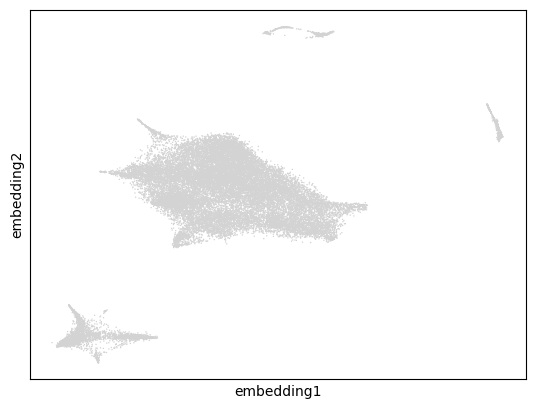

In [7]:
sc.pl.embedding(basis="embedding", adata=adata)

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


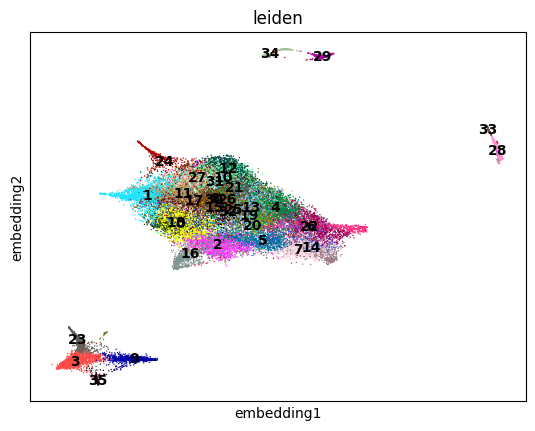

In [14]:
sc.pp.neighbors(adata, use_rep="projections", random_state=0)
sc.tl.leiden(adata, random_state=0, resolution=2.5)
sc.pl.embedding(basis="embedding", adata=adata, color=["leiden"], legend_loc='on data')

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: Perform

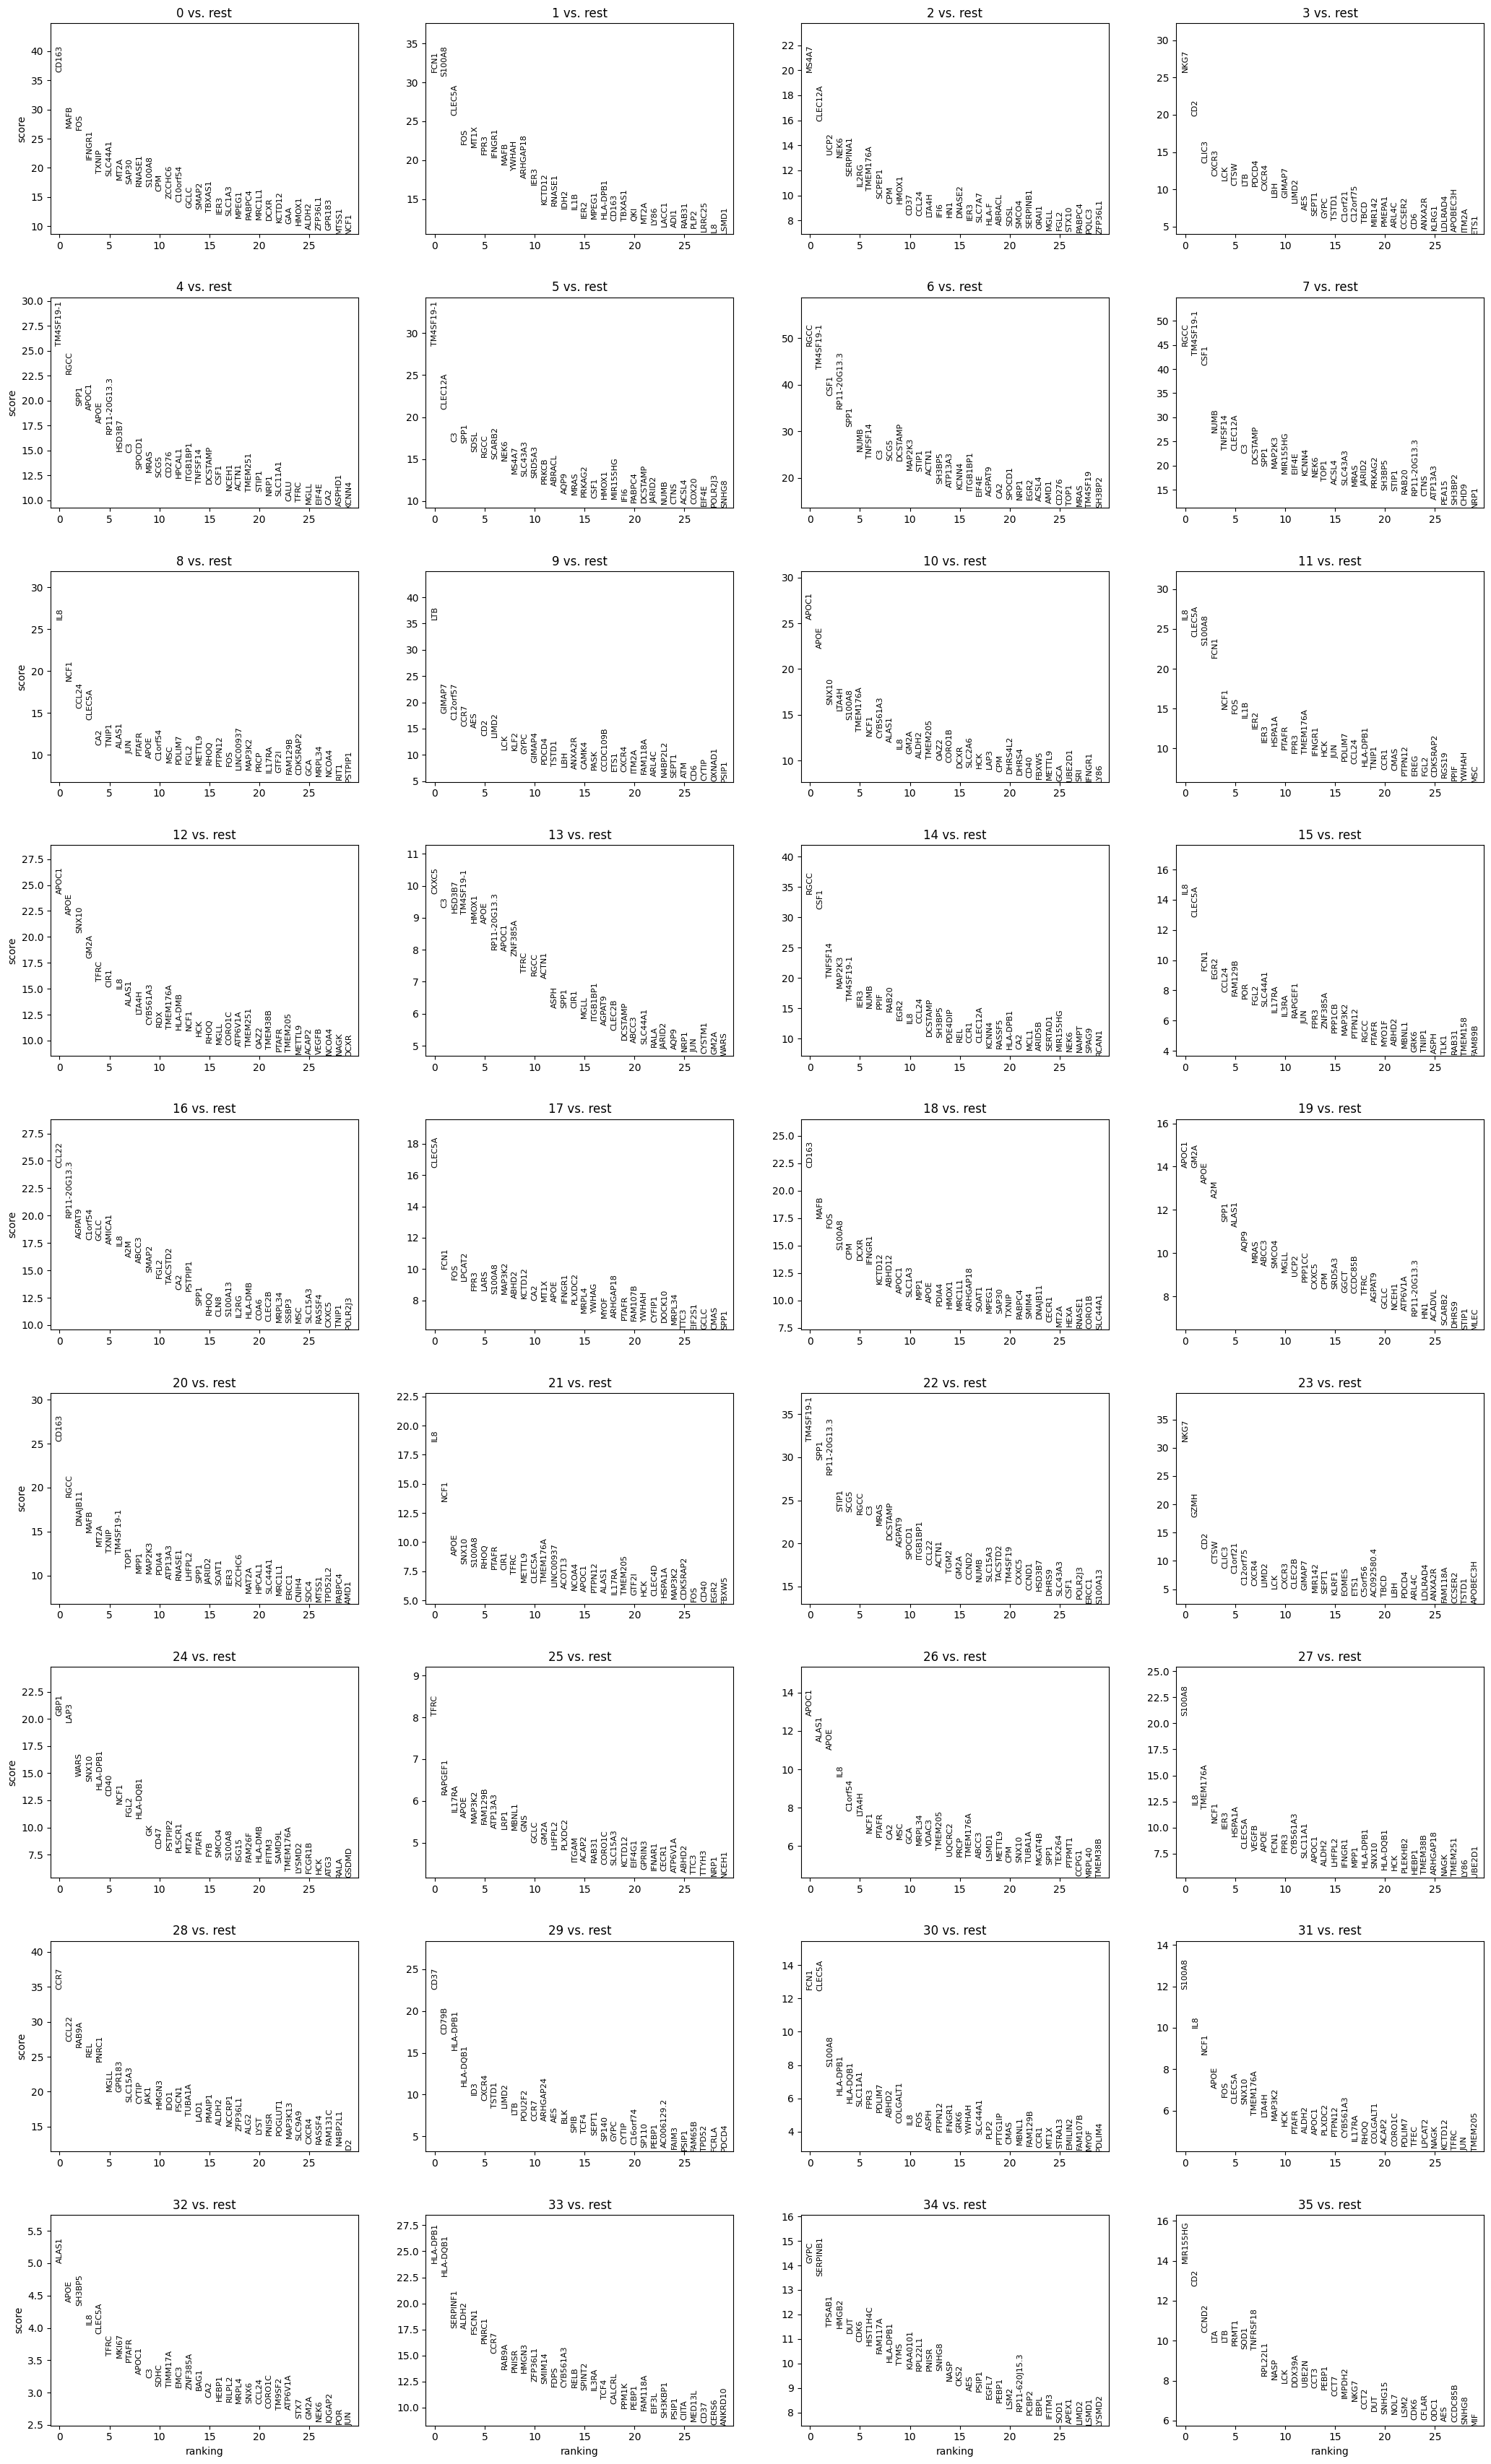

In [15]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False, save=True)

In [8]:
cellDF = sc.tl.marker_gene_overlap(adata, types)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(cellDF)


                   0    1    2    3    4    5    6    7    8    9   10   11  \
Monocytes        1.0  5.0  2.0  0.0  1.0  2.0  1.0  2.0  2.0  0.0  2.0  5.0   
Dendritic cells  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
B-cells          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
T-helpers        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
T cells          0.0  0.0  0.0  6.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0   
Natural Killers  0.0  1.0  2.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   

                  12   13   14   15   16   17   18   19   20   21   22   23  \
Monocytes        1.0  1.0  2.0  4.0  2.0  4.0  1.0  2.0  1.0  2.0  1.0  0.0   
Dendritic cells  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
B-cells          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
T-helpers        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
T cells          0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [9]:
{"B Cells", "Monocytes", "DCs", "NK Cells", "T Cells"}

celltypedict_layer1 = {"0": "Monocytes",
                       "1": "Monocytes",
                       "2": "Monocytes",
                       "3": "T Cells",
                       "4": "Monocytes",
                       "5": "Monocytes",
                       "6": "Monocytes",
                       "7": "Monocytes",
                       "8": "Monocytes",
                       "9": "T Cells",
                       "10": "Monocytes",
                       "11": "Monocytes",
                       "12": "Monocytes",
                       "13": "Monocytes",
                       "14": "Monocytes",
                       "15": "Monocytes",
                       "16": "Monocytes",
                       "17": "Monocytes",
                       "18": "Monocytes",
                       "19": "Monocytes",
                       "20": "Monocytes",
                       "21": "Monocytes",
                       "22": "Monocytes",
                       "23": "NK Cells",
                       "24": "Monocytes",
                       "25": "Monocytes",
                       "26": "Monocytes",
                       "27": "Monocytes",
                       "28": "DCs",
                       "29": "B Cells",
                       "30": "Monocytes",
                       "31": "Monocytes",
                       "32": "Monocytes",
                       "33": "DCs",
                       "34": "B Cells",
                       "35": "Cytotoxic Ts",
                       }



print(adata.obs.leiden.replace(celltypedict_layer1))
adata.obs["CellType1"] = adata.obs.leiden.replace(celltypedict_layer1)

cell_barcode
AAACCCAAGGGTTAGC1    Monocytes
AAACCCACACTAGGCC1    Monocytes
AAACCCACACTGAGGA1    Monocytes
AAACCCACATGGTACT1    Monocytes
AAACCCAGTGGGCTTC1    Monocytes
                       ...    
TTTGGTTTCCATATGG5    Monocytes
TTTGGTTTCGCTTACC5    Monocytes
TTTGTTGAGGCAATGC5    Monocytes
TTTGTTGCACGCACCA5      T Cells
TTTGTTGTCTTCTTCC5    Monocytes
Name: leiden, Length: 29433, dtype: category
Categories (6, object): ['Monocytes', 'T Cells', 'NK Cells', 'DCs', 'B Cells', 'Cytotoxic Ts']


/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


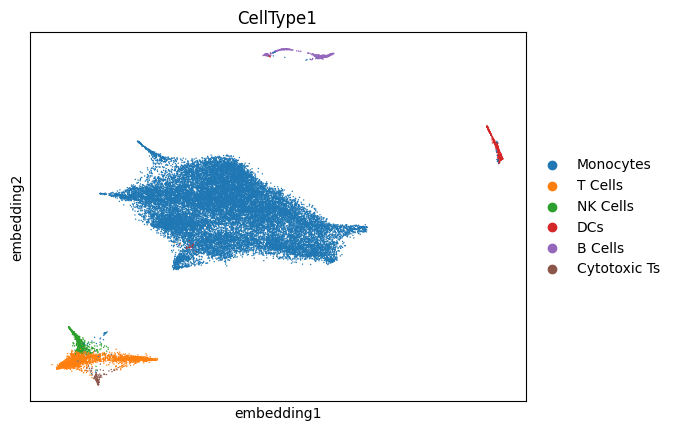

In [10]:
sc.pl.embedding(basis="embedding", adata=adata, color=["CellType1"])

In [11]:
types2 = {
		'B cells' : [
			'PXK',
			'MS4A1',
			'CD19',
			'CD74',
			'CD79A',
			'BANK1',
			'PTPRC',
			'CR2'],
        'B Memory' : ["NPIB15",
                      "BACH2",
                      "IL7",
                      "NMBR",
                      "MS4A1",
                      "MBL2",
                      "LY86"],
        'B Naive' : ["P2RX5",
                      "SIK1",
                      "SLC12A1",
                      "SELL",
                      "RALGPS2",
                      "PTPRCAP",
                      "PSG2"],
        'Basophils' : ["CCL4",
                      "NPL",
                      "WRN",
                      "NFIL3",
                      "TEC",
                      "OTUB2",
                      "FAR2"],
        'DCs' : ["ITGAX",
                      "ZBTB46",
                      "LAMP3",
                      "CXCR1",
                      "ITGAM",
                      "FCER1A",
                      "IL6"],
        'Eosinophils' : ["CSF2",
                      "EPX",
                      "SIGLEC8",
                      "CCL5",
                      "IKZF2",
                      "CPA3",
                      "PRPG2"],
        'Gamma T Cells' : ["S100B",
                      "TUBB",
                      "TRGJP2",
                      "STMN1",
                      "TRGV9",
                      "CCL5",
                      "HMGB2"],
	    'Macrophages' : ["CD68",
                      "FCGR1",
                      "NAAA",
                      "JAML",
                      "TYROBP",
                      "LYZ2",
                      "H2-DMA"],
	    'Mast Cells' : ["SLC29A1",
                      "KIT",
                      "LTC4S",
                      "TPSAB1",
                      "IL1RL1",
                      "HDC",
                      "TPSB2"],
	    'Megakaryocytes' : ["PLK3",
                      "PROX1",
                      "SYP",
                      "TSPAN9",
                      "RGS18",
                      "GATA2",
                      "VWF"],
        'Monocytes' : ["APOBEC3A",
                      "LYZ",
                      "CD14",
                      "CFP",
                      "HLA-DRA",
                      "S100A9",
                      "S100A8",
                      "CSF3R"],
		'Myeloid Suppressors' : ["S100A4",
                      "S100A9",
                      "ICAM1",
                      "S100A8",
                      "ITGAM",
                      "LY6G",
                      "GR1"],
	    'NKT' : ["IL12RB2",
                      "NCAM1",
                      "GATA3",
                      "CD44",
                      "IL2RB",
                      "CXCR4",
                      "SLAMF7"],
	    'Neutrophils' : ["CSF3R",
                      "LY6G",
                      "S100A8",
                      "TREM1",
                      "IL1R2",
                      "CFP",
                      "ADAM8"],
	    'NK' : ["NKG7",
                      "GNLY",
                      "KLRD1",
                      "KLRF1",
                      "NCR1",
                      "DOCK2",
                      "GZMA"],
	    'Nuocytes' : ["IL1RL1",
                      "ICOS",
                      "IL17RB",
                      "IL7R",
                      "CRLF2",
                      "ARG1",
                      "GATA3"],
    	'Plasma Cells' : ["MZB1",
                      "IGHG1",
                      "SPAG4",
                      "TGM5",
                      "SIK1",
                      "RPL3P7",
                      "RGS13"],
        'Plasmacytoid DCs' : ["BST2",
                      "CLEC4C",
                      "MAP3K2",
                      "KLK1",
                      "CMAH",
                      "TRADD",
                      "LILRA4"],
        'T Cells' : ["TRBC2",
                      "CD3D",
                      "CD3G",
                      "CD3E",
                      "LTB",
                      "IL7R",
                      "LEF1"],
        'Cytotoxic T' : ["TRAC",
                      "CD8A",
                      "GZMB",
                      "CD2",
                      "CD27",
                      "CD5",
                      "CD27"],
        'Follicular T' : ["ICOS",
                      "PDCD1",
                      "BCL6",
                      "CXCR5",
                      "CD200",
                      "P2RX7",
                      "CD3D"],
        'Helper T' : ["CCR4",
                      "CD4",
                      "IL13",
                      "CD28",
                      "CD3G",
                      "IL2",
                      "CCR6"],
        'Memory T' : ["CCR7",
                      "CD2",
                      "PTPRC",
                      "CD28",
                      "LEF1",
                      "S100A8",
                      "GIMAP4"],
        'Follicular T' : ["IKZF2",
                      "FOXP3",
                      "CCR4",
                      "ENTPD1",
                      "IL2RA",
                      "ITGAE",
                      "TNFRSF4",
                      "CTLA4"],
	}

In [12]:
cellDF = sc.tl.marker_gene_overlap(adata, types2)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(cellDF)

                       0    1    2    3    4    5    6    7    8    9   10  \
B cells              0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
B Memory             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
B Naive              0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
Basophils            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
DCs                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Eosinophils          0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Gamma T Cells        0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Macrophages          0.0  1.0  2.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0   
Mast Cells           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Megakaryocytes       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Monocytes            2.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  3.0   
Myeloid Suppressors  3.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [13]:
genes = adata.uns["rank_genes_groups"]["names"].transpose()
genesArr = np.array([])
for i in np.arange(0, 20):
    genelist = np.array(list(genes[i]))
    if i == 0:
        genesArr = genelist[:, np.newaxis]
    else:
        genesArr = np.concatenate((genesArr, genelist[:, np.newaxis]), axis=1)

for i in np.arange(0, 35):
    genelist = list(genesArr[i])
    print(i)
    print(*genelist, sep =', ')


0
SAT1, CD163, GPX1, S100A4, ALOX5AP, CEBPD, NEAT1, AIF1, FKBP5, MAFB, FOS, HSP90B1, C1orf162, THBS1, GLUL, MS4A4A, S100A6, GRN, CST3, CD81
1
S100A9, S100A4, AIF1, GPX1, CCL2, FCN1, TGFBI, NPC2, S100A8, MMP9, FCER1G, LGALS1, LST1, AP1S2, CD14, CST3, CLEC5A, EMP3, TIMP1, TYMP
2
B2M, TMSB4X, LGALS3, TYROBP, TMEM176B, AIF1, MS4A7, CALR, PRDX1, HLA-B, MS4A4A, SOD2, PLA2G7, LY96, CLEC12A, TNFSF13B, CTSS, HLA-A, CD86, HLA-E
3
CCL5, RPS3, RPS19, RPS27, RPS27A, RPS12, RPL41, RPL13, RPL30, RPL28, RPS15A, RPL34, RPS14, RPL10, RPLP1, EEF1A1, RPL39, RPS23, RPS4X, TPT1
4
MATK, IL1RN, ACTB, CSTB, MFSD12, TM4SF19-1, S100A11, FABP5, VIM, RGCC, BCL2A1, CD9, EIF4A1, HMGA1, TCEB1, LIPA, ACTG1, SH3BGRL3, CTSD, CD63
5
LGALS3, IL1RN, FABP5, MFSD12, S100A11, LPL, FDX1, TM4SF19-1, CTSL, TCEB1, GSTO1, EIF4A1, CSTB, CD63, CD9, HMG20B, UPP1, VIM, FERMT3, PLA2G7
6
RGCC, TM4SF19-1, IL1RN, MFSD12, CSF1, MATK, CD63, RP11-20G13.3, S100A11, OCSTAMP, ATF3, SPP1, EMP1, RHOC, ACTG1, PLAUR, PLEK, CCL3, VIM, FERMT3
7
IL1RN

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


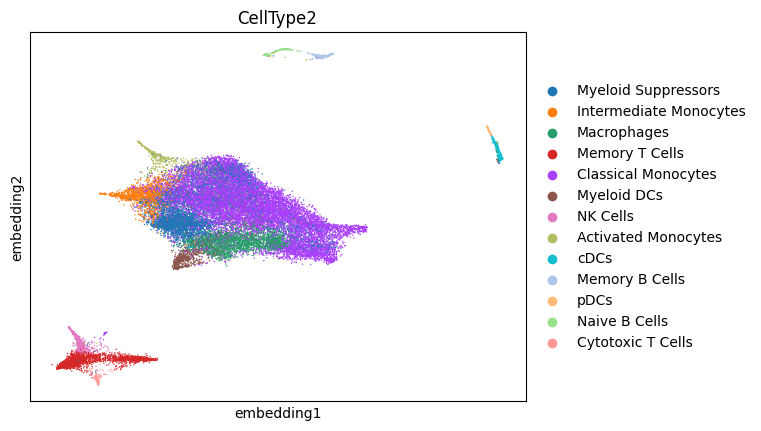

In [14]:
celltypedict_layer2 = {"0": "Myeloid Suppressors",#"Monocytes",
                       "1": "Intermediate Monocytes",#Monocytes",
                       "2": "Macrophages",#"Monocytes",
                       "3": "Memory T Cells",#"T Cells",
                       "4": "Classical Monocytes",#"Monocytes",
                       "5": "Macrophages",#"Monocytes",
                       "6": "Classical Monocytes",#"Monocytes",
                       "7": "Classical Monocytes",#"Monocytes",
                       "8": "Classical Monocytes",#"Monocytes",
                       "9": "Memory T Cells",#"T Cells",
                       "10": "Myeloid Suppressors",#"Monocytes",
                       "11": "Classical Monocytes",#"Monocytes",
                       "12": "Classical Monocytes",#"Monocytes",
                       "13": "Classical Monocytes",#"Monocytes",
                       "14": "Classical Monocytes",#"Monocytes",
                       "15": "Classical Monocytes",#"Monocytes",
                       "16": "Myeloid DCs",#"Monocytes",
                       "17": "Myeloid Suppressors",#"Monocytes",
                       "18": "Myeloid Suppressors",#"Monocytes",
                       "19": "Classical Monocytes",#"Monocytes",
                       "20": "Myeloid Suppressors",#"Monocytes",
                       "21": "Classical Monocytes",#"Monocytes",
                       "22": "Classical Monocytes",#"Monocytes",
                       "23": "NK Cells",#"T Cells",
                       "24": "Activated Monocytes",#"Monocytes",
                       "25": "Classical Monocytes",#"Monocytes",
                       "26": "Classical Monocytes",#"Monocytes",
                       "27": "Classical Monocytes",#"Monocytes",
                       "28": "cDCs",#"cDC2s",
                       "29": "Memory B Cells",#"B Cells",
                       "30": "Myeloid Suppressors",#"Monocytes",
                       "31": "Classical Monocytes",#"Monocytes",
                       "32": "Classical Monocytes",#"Monocytes",
                       "33": "pDCs",#"DCs",
                       "34": "Naive B Cells",#"B Cells",
                       "35": "Cytotoxic T Cells"}#"Cytotoxic Ts",}


adata.obs["CellType2"] = adata.obs.leiden.replace(celltypedict_layer2)
sc.pl.embedding(basis="embedding", adata=adata, color=["CellType2"])

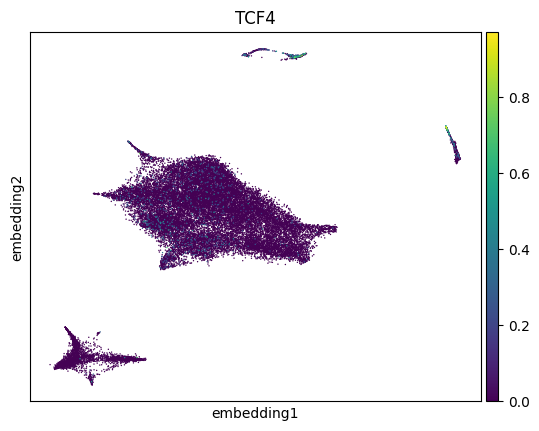

In [57]:
#Color by CD16
#Color by CD11/CD123
sc.pl.embedding(basis="embedding", adata=adata, color=["TCF4"])

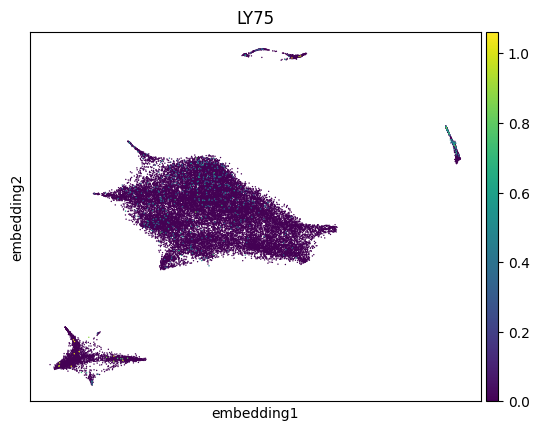

In [69]:
sc.pl.embedding(basis="embedding", adata=adata, color=["LY75"])

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


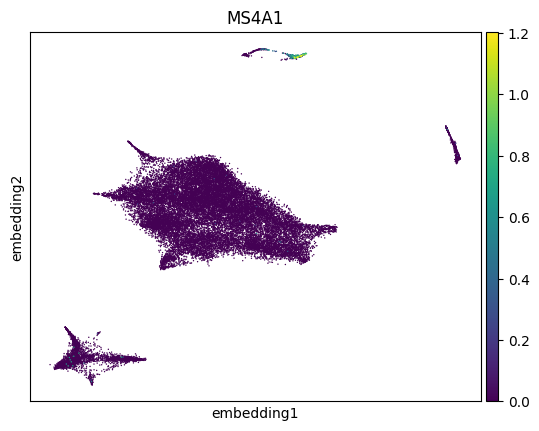

In [43]:
sc.pl.embedding(basis="embedding", adata=adata, color=["MS4A1"])

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


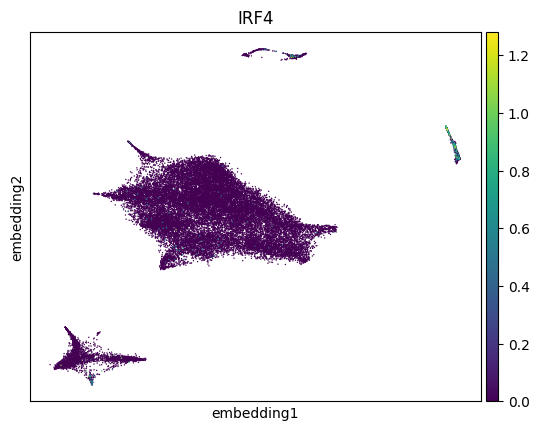

In [44]:
sc.pl.embedding(basis="embedding", adata=adata, color=["IRF4"])

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


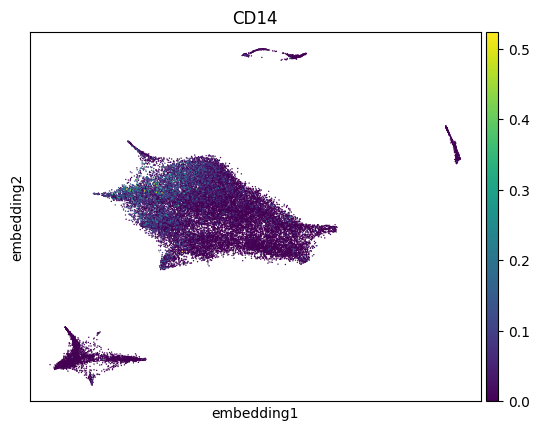

In [45]:
sc.pl.embedding(basis="embedding", adata=adata, color=["CD14"])

In [46]:
#print(adata.obs)
cellDF = adata.obs[["CellType1", "CellType2"]]
cellDF.columns = ["Cell Type", "Cell Type2"]
cellDF.index.name = None
cellDF.to_csv("ThomsonCellTypes.csv")

### Note to self: cDC fine since it expresses markers and LY75 but no TRF
### Monocytic DC good because no LY75 and CD52
### Activated Monocyte has a ton of interferon induced genes

## Double Detection

In [20]:
import doubletdetection
X = an.read_h5ad("/opt/andrew/thomson_raw.h5ad")
sc.pp.filter_genes(X, min_cells=1)
clf = doubletdetection.BoostClassifier(
    n_iters=10,
    clustering_algorithm="louvain",
    standard_scaling=True,
    pseudocount=0.1,
    n_jobs=-1,
)
doublets = clf.fit(X.X).predict(p_thresh=1e-16, voter_thresh=0.5)
doublet_score = clf.doublet_score()
adata.obs["doublet"] = doublets
adata.obs["doublet_score"] = doublet_score

  0%|          | 0/10 [00:00<?, ?it/s]

In [22]:
sc.pl.embedding(basis="embedding", adata=adata, color=["doublet", "doublet_score"])

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


In [31]:
import matplotlib.pyplot as plt
sc.pl.embedding(basis="embedding", adata=adata)
plt.show()

/home/brianoj/.cache/pypoetry/virtualenvs/sccp-rvA4szVo-py3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


In [29]:
import seaborn as sns
sns.scatterplot()

<Axes: xlabel='embedding1', ylabel='embedding2'>